In [2]:
import os
from src.data_manip.game_session.game_session import GameSession
from src.data_manip.game_session.challenge import CrocosMazeChallenge
import pandas as pd

In [3]:
game_session = GameSession.from_json(os.path.join("tests", "data_manipulation", "game_session", "dummy_data", "test.json"))

In [4]:
digit_inputs = game_session.to_dataframe().sort_values(by=["ts"], ascending=True)

In [5]:
digit_inputs[digit_inputs["ts"] > 115]

,ts,touch_count,x,y,finger_id,phase_digit,activity,challenge,phase
0,1.634718e+09,1,0.617191,0.222315,0,Ended,ScreenCalib,NaN,NaN
1,1.634718e+09,1,0.985008,0.171524,0,Began,ScreenCalib,NaN,NaN
2,1.634718e+09,1,0.985008,0.171524,0,Stationary,ScreenCalib,NaN,NaN
3,1.634718e+09,1,0.985008,0.171524,0,Ended,ScreenCalib,NaN,NaN
4,1.634718e+09,1,0.203898,0.021649,0,Began,ScreenCalib,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10611,1.634720e+09,1,0.221552,0.189280,0,Moved,CrocoSpot,3.0,4.0
10612,1.634720e+09,1,0.226887,0.198168,0,Ended,CrocoSpot,3.0,4.0
10613,1.634720e+09,1,0.462269,0.465445,0,Began,CrocoSpot,3.0,4.0
10614,1.634720e+09,1,0.462269,0.465445,0,Stationary,CrocoSpot,3.0,4.0


In [6]:
import seaborn as sns
def plot_challenge(game_session: GameSession, challenge: int, ax=None):
    curve = pd.DataFrame.from_records([{"x": point[0], "y": point[1], "t": point[2], "type": "model"} for point in game_session.sorted_activities[0].challenges[challenge].curve_points()])
    curve_user = pd.DataFrame.from_records([{"x": point[0], "y": point[1], "t": point[2], "type": "user"} for point in game_session.sorted_activities[0].challenges[challenge].digit_curve()])
    sns.lineplot(x="x", y="y", data=curve, color="red", ax=ax, sort=False)
    sns.lineplot(x="x", y="y", data=curve_user, ax=ax, sort=False)

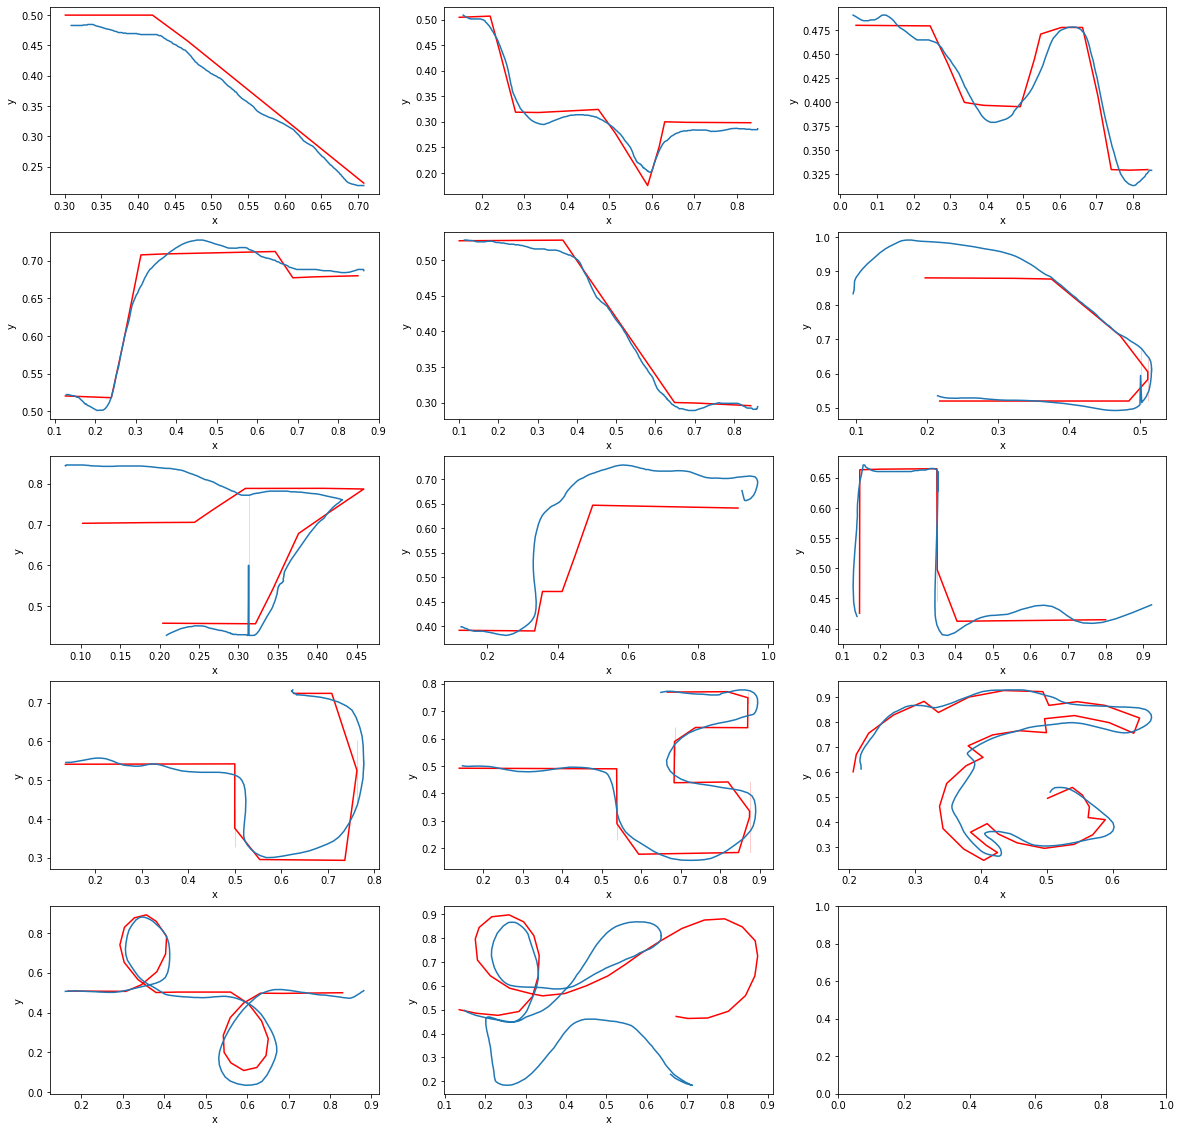

In [7]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(5, 3)
fig.set_size_inches(20, 20)
for challenge in range(len(game_session.sorted_activities[0].challenges)):
    plot_challenge(game_session, challenge, axis[challenge // 3, challenge % 3])


([<matplotlib.axis.XTick at 0x2601c6c5e20>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29')])

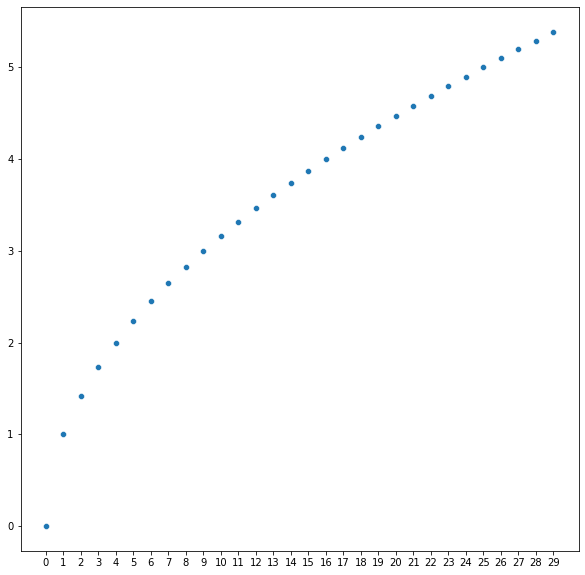

In [8]:
import numpy as np
plt.figure(figsize=(10, 10))
def time_per_sec(x: int):
    return np.sqrt(x)

sns.scatterplot(x=range(30), y=list(map(time_per_sec, range(30))))
plt.xticks(range(30), list(map(str, range(30))))

In [9]:
import plotly.express as px
def plot_3d(game_session: GameSession, challenge: int):
    curve = pd.DataFrame.from_records([{"x": point[0], "y": point[1], "t": point[2], "type": "model"} for point in game_session.sorted_activities[0].challenges[challenge].curve_points()])
    curve_user = pd.DataFrame.from_records([{"x": point[0], "y": point[1], "t": point[2], "type": "user"} for point in game_session.sorted_activities[0].challenges[challenge].digit_curve()])
    curve_df = pd.concat([curve, curve_user])
    fig = px.line_3d(curve_df, x="t", y="x", z="y", color="type")
    fig.show()

In [10]:
plot_3d(game_session, 0)

In [11]:
plot_3d(game_session, 3)

In [12]:
plot_3d(game_session, 12)

In [13]:
plot_3d(game_session, 13)

In [14]:
from tslearn.metrics import lcss, dtw

In [15]:
[lcss(
    np.asarray([ (point[0], point[1]) for point in challenge.digit_curve()]),
    np.asarray([ (point[0], point[1]) for point in challenge.curve_points()]),
    global_constraint="itakura",
    itakura_max_slope=4
) for challenge in game_session.sorted_activities[0].challenges]

c:\Users\demon\Dev\crocos-predict-cog\venv\lib\site-packages\tslearn\metrics\dtw_variants.py:1055: RuntimeWarning:

'itakura_max_slope' constraint is unfeasible (ie. leads to no admissible path) for the provided time series sizes

c:\Users\demon\Dev\crocos-predict-cog\venv\lib\site-packages\tslearn\metrics\dtw_variants.py:1055: RuntimeWarning:

'itakura_max_slope' constraint is unfeasible (ie. leads to no admissible path) for the provided time series sizes



[0.0625,
 0.03571428571428571,
 0.03571428571428571,
 0.038461538461538464,
 0.03571428571428571,
 0.038461538461538464,
 0.043478260869565216,
 0.034482758620689655,
 0.029411764705882353,
 0.8095238095238095,
 0.8387096774193549,
 0.022727272727272728,
 0.023809523809523808,
 0.02564102564102564]

In [16]:
[1/(1 + dtw(
    np.asarray([ (point[0], point[1]) for point in challenge.digit_curve()]),
    np.asarray([ (point[0], point[1]) for point in challenge.curve_points()])
)) for challenge in game_session.sorted_activities[0].challenges]

[0.7571132095292749,
 0.7703207858346418,
 0.8252208449353009,
 0.8305607397891477,
 0.8336061288492588,
 0.5878593967596983,
 0.4820734763324624,
 0.5601549760615503,
 0.818336608700958,
 0.8238591293155553,
 0.8004961955724542,
 0.7371120564761693,
 0.7221377428966311,
 0.21278759596932253]

In [17]:
len(list(game_session.sorted_activities[0].challenges[10].digit_curve()))

135

## Trajectory Similarity Join in Spatial Networks

# Test DTW

In [23]:
from tslearn.metrics import dtw_path

In [24]:
path_sims = [dtw_path(
    np.asarray([ (point[0], point[1]) for point in challenge.digit_curve()]),
    np.asarray([ (point[0], point[1]) for point in challenge.curve_points()])
) for challenge in game_session.sorted_activities[0].challenges]

In [25]:
path_sims

[([(0, 0),
   (1, 0),
   (2, 0),
   (3, 1),
   (4, 1),
   (5, 1),
   (6, 1),
   (7, 1),
   (8, 1),
   (9, 1),
   (10, 1),
   (11, 1),
   (12, 1),
   (13, 1),
   (14, 1),
   (15, 1),
   (16, 1),
   (17, 1),
   (18, 1),
   (19, 1),
   (20, 1),
   (21, 1),
   (22, 1),
   (23, 2),
   (24, 2),
   (25, 2),
   (26, 2),
   (27, 2),
   (28, 2),
   (29, 2),
   (30, 2),
   (31, 2),
   (32, 2),
   (33, 2),
   (34, 2),
   (35, 2),
   (36, 2),
   (37, 2),
   (38, 2),
   (39, 3),
   (40, 3),
   (41, 3),
   (42, 3),
   (43, 3),
   (44, 3),
   (45, 3),
   (46, 3),
   (47, 3),
   (48, 3),
   (49, 3),
   (50, 3),
   (51, 3),
   (52, 3),
   (53, 3),
   (54, 3),
   (55, 3),
   (56, 3),
   (57, 3),
   (58, 3),
   (59, 3),
   (60, 4),
   (61, 4),
   (62, 4),
   (63, 4),
   (64, 4),
   (65, 4),
   (66, 4),
   (67, 4),
   (68, 4),
   (69, 4),
   (70, 4),
   (71, 4),
   (72, 4),
   (73, 4),
   (74, 4),
   (75, 4),
   (76, 4),
   (77, 4),
   (78, 5),
   (79, 5),
   (80, 5),
   (81, 5),
   (82, 5),
   (83, 5),
  

In [26]:
from scipy.spatial.distance import cdist

In [27]:
from typing import Tuple
def dtw_plot(path_sim: Tuple[list, int], digit_points: np.array, curve_points: np.array, ax=plt):
    path, sim = path_sim
    ax.plot(digit_points[:, 0], digit_points[:, 1], "g-", label='User digits trajectory')
    ax.plot(curve_points[:, 0], curve_points[:, 1], "b-", label='Optimal trajectory')

    for positions in path:
        ax.plot(
            [
                digit_points[positions[0], 0],
                curve_points[positions[1], 0]
            ],
            [
                digit_points[positions[0], 1],
                curve_points[positions[1], 1]
            ],
            color='orange',
        )

    ax.legend()
    if (isinstance(ax, plt.Axes)):
        ax.set_title(f"DTW distance: {(1/(1+sim)):.2f}")


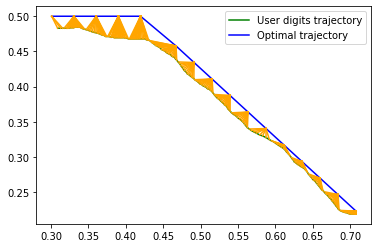

In [28]:
dtw_plot(path_sims[0], np.asarray([ (point[0], point[1]) for point in game_session.sorted_activities[0].challenges[0].digit_curve()]), np.asarray([ (point[0], point[1]) for point in game_session.sorted_activities[0].challenges[0].curve_points()]))

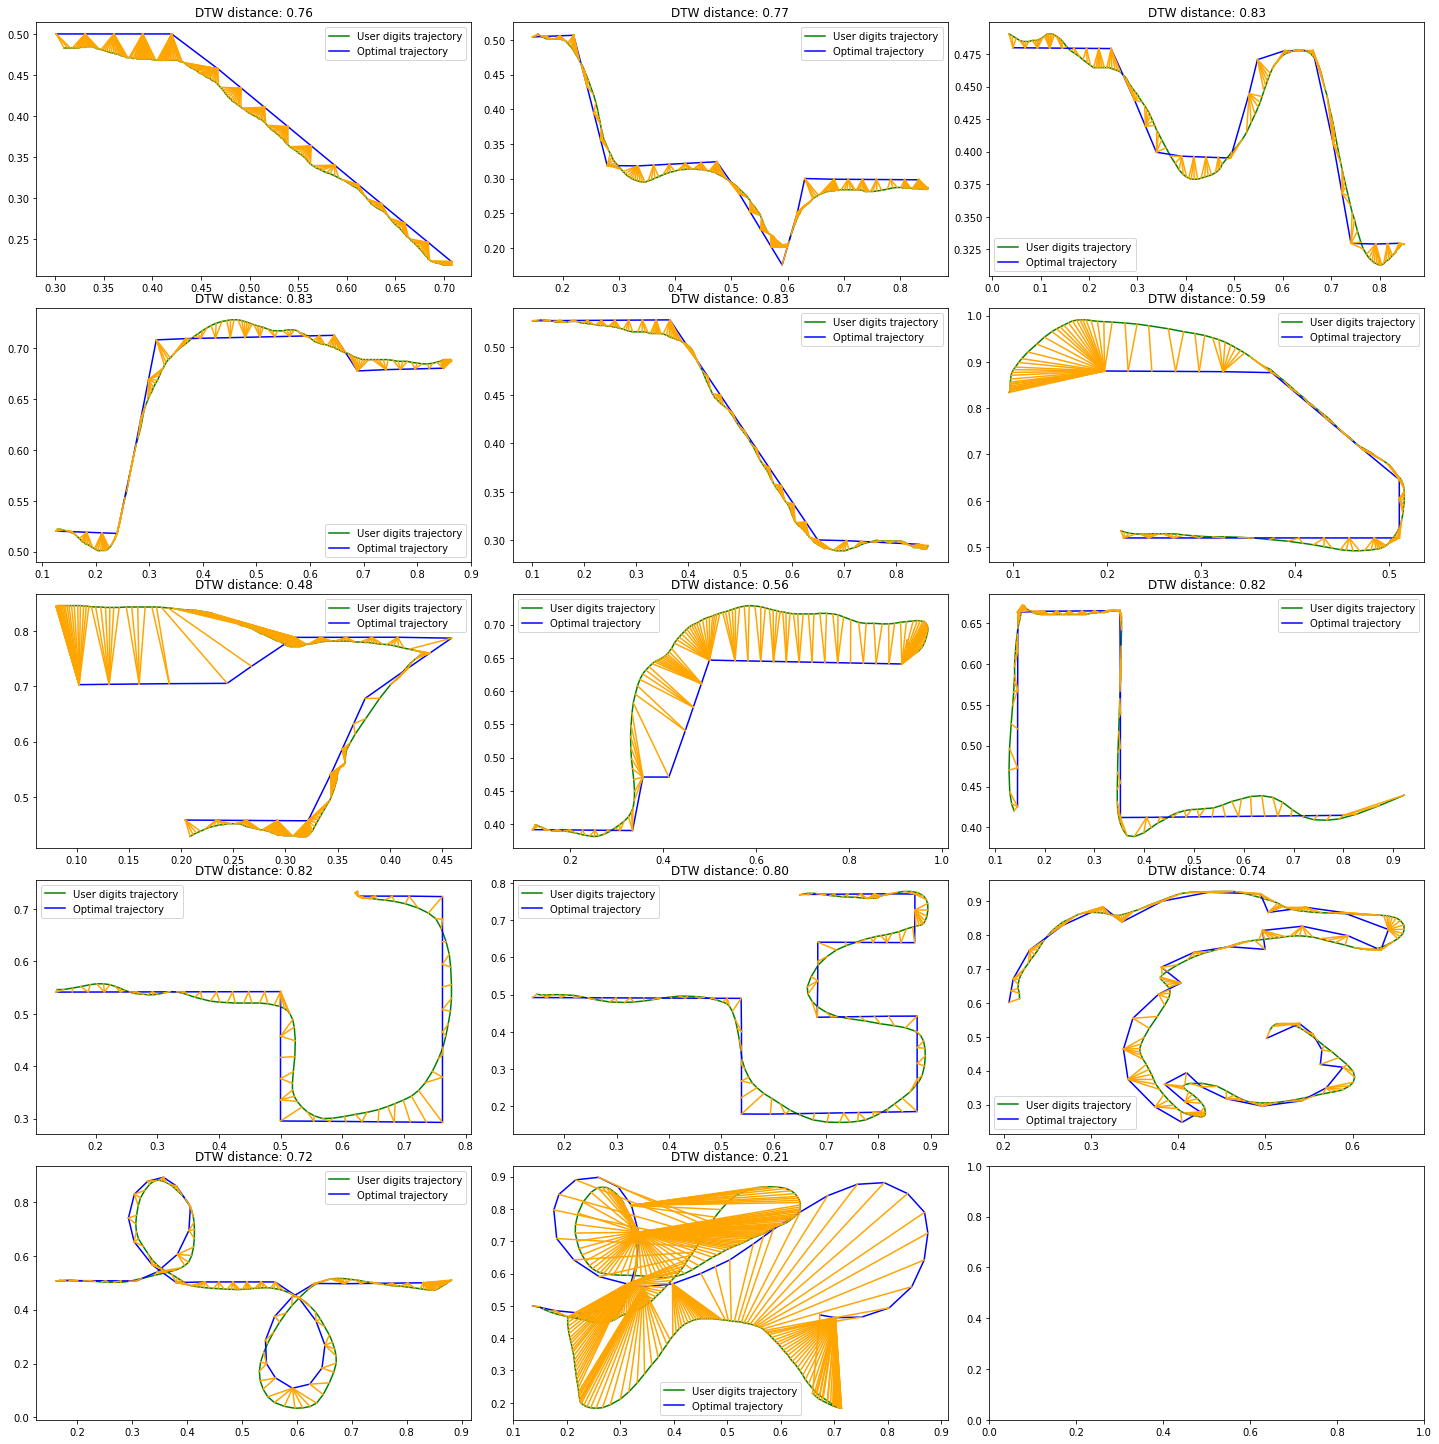

In [29]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(5, 3)
fig.set_size_inches(20, 20)
fig.tight_layout()
for i, challenge in enumerate(game_session.sorted_activities[0].challenges):
    dtw_plot(path_sims[i], np.asarray([ (point[0], point[1]) for point in challenge.digit_curve()]), np.asarray([ (point[0], point[1]) for point in challenge.curve_points()]), axis[i // 3, i % 3])


In [52]:
indicateurs = [
    ("Axel","Attention", "Educateur", 2),
    ("Axel","Attention", "Jeu", 1),
    ("Axel","Mémoire","Educateur", 1),
    ("Axel","Mémoire","Jeu", 1),
    ("Axel","Langage","Educateur", 2),
    ("Axel","Langage","Jeu", 3),
    ("Axel","Fonctions Executives","Educateur",1),
    ("Axel","Fonctions Executives","Jeu",2),
    ("Axel","Capacités visuo-spatiales","Educateur",2),
    ("Axel","Capacités visuo-spatiales","Jeu",1),
    ("Axel","Résolution pb","Educateur",3),
    ("Axel","Résolution pb","Jeu",2),
    ("Axel","Planification","Educateur",4),
    ("Axel","Planification","Jeu",1),
    ("Axel","Habilités sociales","Educateur",1),
    ("Axel","Habilités sociales","Jeu",2),
    ("Axel","Motricité","Educateur",1),
    ("Axel","Motricité","Jeu",2),
    ("Axel","Emotion","Educateur",2),
    ("Axel","Meta-cognition","Educateur",1),
]

indicateurs = pd.DataFrame(indicateurs, columns=["Enfant","Indicateur", "Type", "Valeur"])
indicateurs

,Enfant,Indicateur,Type,Valeur
0,Axel,Attention,Educateur,2
1,Axel,Attention,Jeu,1
2,Axel,Mémoire,Educateur,1
3,Axel,Mémoire,Jeu,1
4,Axel,Langage,Educateur,2
5,Axel,Langage,Jeu,3
6,Axel,Fonctions Executives,Educateur,1
7,Axel,Fonctions Executives,Jeu,2
8,Axel,Capacités visuo-spatiales,Educateur,2
9,Axel,Capacités visuo-spatiales,Jeu,1


In [53]:
import plotly.express as px
fig = px.sunburst(indicateurs, path=['Enfant', 'Type', 'Indicateur'], values='Valeur')
fig.show()

c:\Users\demon\Dev\crocos-predict-cog\venv\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\demon\Dev\crocos-predict-cog\venv\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\demon\Dev\crocos-predict-cog\venv\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [54]:
fig = px.bar_polar(indicateurs, r="Valeur", theta="Indicateur",
                   color="Type", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                   )
fig.update_layout(
    polar = dict(
        radialaxis = dict(showticklabels=False, ticks=''),
    )
)
fig.show()

In [183]:
fig = px.line_polar(indicateurs, r="Valeur", theta="Indicateur",
                   color="Type", template="plotly_dark",
                   line_close=True,
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
        radialaxis = dict(showticklabels=False, ticks=[-2, -1, 0, 1, 2]),
    )
)
fig.show()

c:\Users\demon\Dev\crocos-predict-cog\venv\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\demon\Dev\crocos-predict-cog\venv\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

